In [12]:
path_kaggle = "/content/drive/MyDrive/kaggle"
path_xray = path_kaggle + "/x-ray-dection"

path_train = path_xray + "/training"
path_train_fractured = path_train + "/fractured"
path_train_not_fractured = path_train + "/not_fractured"

path_test = path_xray + "/testing"
path_test_fractured = path_test + "/fractured"
path_test_not_fractured = path_test + "/not_fractured"

image_location_paths = [path_train_fractured, path_train_not_fractured, path_test_fractured, path_test_not_fractured]
image_train_location_paths = [path_train_fractured, path_train_not_fractured]
image_test_location_paths = [path_test_fractured, path_test_not_fractured]

Посмотрим репрезентативность обучающей выборки

In [14]:
import os
def group_images(image_paths):

  grouped_imgs = dict()

  for path in image_paths:
    key = "/".join(path.split("/")[:-1]) + "/" + path.split("/")[-1].split(".")[0].split("-")[0]
    if key not in grouped_imgs:
      grouped_imgs[key] = []
    grouped_imgs[key].append(path)

  return grouped_imgs

images_paths = []

for path in image_train_location_paths:
  for dirname, _, filenames in os.walk(path):
    for filename in filenames:
      full_path = os.path.join(dirname, filename)
      images_paths.append(full_path)

images = group_images(images_paths)
print(len(images))
for (key, value) in list(images.items())[:10]:
  print(f"Image {key}: samples {len(value)}")

178
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/75: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/73: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/74: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/71: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/72: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/78: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/79: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/80: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/77: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/76: samples 40


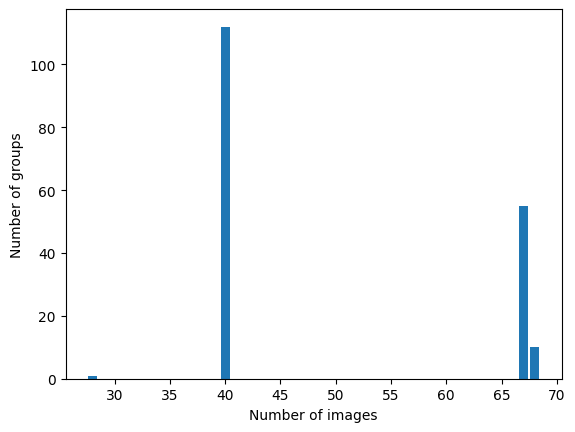

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

img_samples_dict = dict()
for key, value in images.items():
  if len(value) not in img_samples_dict:
    img_samples_dict[len(value)] = []
  img_samples_dict[len(value)].append(key)

fig, ax = plt.subplots()
ax.set_xlabel("Number of images")
ax.set_ylabel("Number of groups")

ax.bar(img_samples_dict.keys(), list(map(lambda x: len(x), img_samples_dict.values())))
plt.show()

In [16]:
import numpy as np
train_mean = np.mean(list(img_samples_dict.keys()))
train_std = np.std(list(img_samples_dict.keys()))
train_v = train_std / train_mean

print(f"Mean: {train_mean}")
print(f"Std: {train_std}")
print(f"Cov: {train_v}")

Mean: 50.75
Std: 17.282577932704367
Cov: 0.34054340754097273


Посмотрим, можем ли мы лучше разделить train & test вручную

In [18]:
from itertools import groupby
import os

def group_images(image_paths):

  grouped_imgs = dict()

  for path in image_paths:
    key = "/".join(path.split("/")[:-1]) + "/" + path.split("/")[-1].split(".")[0].split("-")[0]
    if key not in grouped_imgs:
      grouped_imgs[key] = []
    grouped_imgs[key].append(path)

  return grouped_imgs

images_paths = []

for path in image_location_paths:
  for dirname, _, filenames in os.walk(path):
    for filename in filenames:
      full_path = os.path.join(dirname, filename)
      images_paths.append(full_path)

images = group_images(images_paths)
print(len(images))
for key, value in list(images.items())[:10]:
  print(f"Image {key}: samples {len(value)}")

191
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/75: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/73: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/74: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/71: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/72: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/78: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/79: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/80: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/77: samples 40
Image /content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/76: samples 40


Key: 40, value: 121
Key: 67, value: 58
Key: 68, value: 10
Key: 28, value: 1
Key: 39, value: 1


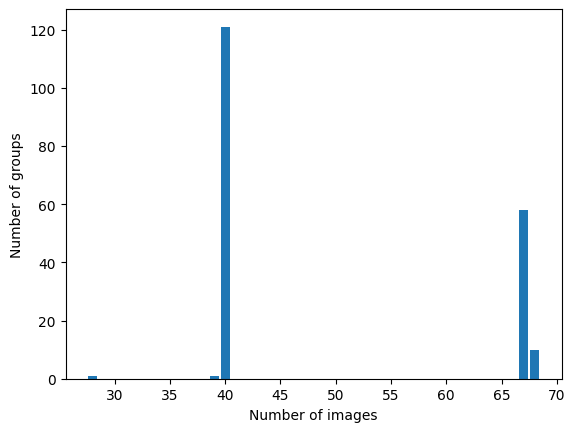

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

img_samples_dict = dict()
for key, value in images.items():
  if len(value) not in img_samples_dict:
    img_samples_dict[len(value)] = []
  img_samples_dict[len(value)].append(key)

fig, ax = plt.subplots()
ax.set_xlabel("Number of images")
ax.set_ylabel("Number of groups")

for key, value in img_samples_dict.items():
  print(f"Key: {key}, value: {len(value)}")

ax.bar(img_samples_dict.keys(), list(map(lambda x: len(x), img_samples_dict.values())))
plt.show()

In [20]:
train_mean = np.mean(list(img_samples_dict.keys()))
train_std = np.std(list(img_samples_dict.keys()))
train_v = train_std / train_mean

print(f"Mean: {train_mean}")
print(f"Std: {train_std}")
print(f"Cov: {train_v}")

Mean: 48.4
Std: 16.156732342896568
Cov: 0.333816783944144


Видим, что результат сильно не улучшился. В датасете присутсвуют аномалии, 28 и 39 изображений для одного пациента. Поскольку 39 близко к матожиданию, оставим эти изображения, а 28 изображений перенесем в валидацию, т.к их скорее всего будут нерепрезентативными для обучения на ранних стадиях. Набор на 67 и 68 изображений обрежем до 40

In [21]:
images_filtered = dict()
val_addition = []
for k, v in images.items():
  if len(v) <= 28:
    val_addition.append(v)
    continue
  new_v = v[0:40] if len(v) > 40 else v
  images_filtered[k] = v

images_filtered = list(images_filtered.items())
print(images_filtered)

[('/content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/75', ['/content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/75-rotated3-rotated2.jpg', '/content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/75-rotated1-rotated1-rotated3.jpg', '/content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/75-rotated3-rotated3-rotated1.jpg', '/content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/75-rotated3-rotated3.jpg', '/content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/75-rotated1-rotated2-rotated3.jpg', '/content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/75-rotated1-rotated3-rotated3.jpg', '/content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/75-rotated1-rotated1.jpg', '/content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/75-rotated1-rotated3-rotated2.jpg', '/content/drive/MyDrive/kaggle/x-ray-dection/training/fractured/75-rotated3-rotated2-rotated1.jpg', '/content/drive/MyDrive/kaggle/x-ray-dection/training/f

Разобъем выборку на train, val, test

В результате исследования были выявлены потенциальные риски:
1. Некачественные данные: малое или большое количество снимков -> смотрим на распределение и отсеиваем выбросы
2. Риск переобучения -> создаем валидационную выборку
3. Неправильная пометка данных (в train и test номера пациентов совпадают) -> вводим дополнительную метку для изначально предоставленного набора данных
Вывод:
В ходе работы я описал и устранил возможные риски при использовании данных с помощью анализа исходной выборки, подготовил данные и сделал разделение на тренировочную, валидационную и тестовую выборки

In [ ]:
from sklearn.model_selection import train_test_split
import shutil

val_size = 0.2
test_size = 0.2
random_state = 42

train_images, val_images = train_test_split(images_filtered, test_size=val_size, random_state=random_state)
train_images, test_images = train_test_split(train_images, test_size=test_size, random_state=random_state)

val_images += val_addition

train_dest = "/kaggle/x-ray/train"
val_dest = "/kaggle/x-ray/val"
test_dest ="/kaggle/x-ray/test"

shutil.rmtree("/kaggle/x-ray", ignore_errors=True)

os.makedirs(train_dest, exist_ok=True)
os.makedirs(val_dest, exist_ok=True)
os.makedirs(test_dest, exist_ok=True)



for _, imgs in train_images:
  for img in imgs:
    with open(img, 'rb') as src:
      with open(os.path.join(train_dest, img.split("/")[-1]), 'wb') as dest:
        shutil.copyfileobj(src, dest, 1024*1024*8)

for _, imgs in val_images:
  for img in imgs:
    shutil.copy(img, os.path.join(val_dest, img.split("/")[-1]))

for _, imgs in test_images:
  for img in imgs:
    shutil.copy(img, os.path.join(test_dest, img.split("/")[-1]))
